# Deep Learning - Anees Ahmad - 2021/03/14

# 3 Introduction to Keras and TensorFlow

## 3.1 What’s TensorFlow?

- Python-based, free, open source machine learning platform
  - automatically compute the gradient of any differentiable expression, suitable for machine learning.
  - can run on CPUs, GPUs and TPUs, highly parallel hardware accelerators.
  - Computation can be easily distributed across many machines.
  - programs can be exported to other runtimes,This makes TensorFlow applications easy to deploy in practical settings.

### 3.2 What’s Keras?

- Keras is a deep learning API for Python
  - built on top of TensorFlow
  - provides a convenient way to define and train any kind of deep learning model
  - follows best practices for reducing cognitive load
    - offers consistent and simple workflows
    - minimizes the number of actions required for common use cases
    - provides clear and actionable feedback
upon user error

### 3.3 Keras and TensorFlow: A brief history

### 3.4 Setting up a deep learning workspace

### 3.4.1 Jupyter notebooks: The preferred way to run deep learning experiments

### 3.4.2 Using Colaboratory
- `!pip install package_name`
  - to install package in google colab

## 3.5 First steps with TensorFlow

- training a neural network revolves around the following concepts
  - low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:
    - Tensors, including special tensors that store the network’s state (variables)
    - Tensor operations such as addition, relu , matmul
    - Backpropagation, a way to compute the gradient of mathematical expressions (handled in TensorFlow via the GradientTape object)
  - high-level deep learning concepts. This translates to Keras APIs:
    - Layers, which are combined into a model
    - A loss function, which defines the feedback signal used for learning
    - An optimizer, which determines how learning proceeds
    - Metrics to evaluate model performance, such as accuracy
    - A training loop that performs mini-batch stochastic gradient descent


### 3.5.1 Constant tensors and variables

In [1]:
# Listing 3.1 All-ones or all-zeros tensors
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print("***")
print(x)
print("***")
x = tf.zeros(shape=(2, 1))
print(x)
print("***")

***
tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
***
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
***


In [2]:
# Listing 3.2 Random tensors
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print("***")
print(x)
print("***")
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)
print("***")


***
tf.Tensor(
[[ 0.8923815 ]
 [-1.2115468 ]
 [-0.06103132]], shape=(3, 1), dtype=float32)
***
tf.Tensor(
[[0.1802615 ]
 [0.6514535 ]
 [0.82816374]], shape=(3, 1), dtype=float32)
***


- NumPy arrays
  - are assignable
- TensorFlow tensors
  - aren’t assignable: they’re constant.
  - tf.Variable is the class meant to manage modifiable state in TensorFlow. 

In [3]:
# Listing 3.3 NumPy arrays are assignable
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0

In [4]:
# Listing 3.4 TensorFlow tensors are not assignable
# This will fail
'''
x = tf.ones(shape=(2, 2))
x[0, 0] = 0. 
'''

'\nx = tf.ones(shape=(2, 2))\nx[0, 0] = 0. \n'

In [5]:
# Listing 3.5 Creating a TensorFlow variable
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.74271345],
       [-0.295384  ],
       [-0.7715277 ]], dtype=float32)>


In [6]:
# Listing 3.6 Assigning a value to a TensorFlow variable
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
# Listing 3.7 Assigning a value to a subset of a TensorFlow variable
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

- assign_add()
  - +=
- assign_sub()
  - -=

In [8]:
# Listing 3.8 Using assign_add()
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### 3.5.2 Tensor operations: Doing math in TensorFlow

In [9]:
# Listing 3.9 A few basic math operations
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

### 3.5.3 A second look at the GradientTape API

In [10]:
# Listing 3.10 Using the GradientTape
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

- only trainable variables are tracked by default. 
- With a constant tensor, manually mark it as being tracked by calling tape.watch() on it.

In [11]:
# Listing 3.11 Using GradientTape with constant tensor inputs
input_const = tf.constant(3.) 
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

- second-order gradients
  - the gradient of a gradient.
  - the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.

In [12]:
# Listing 3.12 Using nested gradient tapes to compute second-order gradients
time = tf.Variable(0.) 
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time) 

### 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

- requirements to build machine learning model based on gradient descent
  - tensors
  - variables
  - tensor operations
  - gradients

- linear classifier
  - A linear classifier is an affine transformation trained to minimize the square of the difference between predictions and the targets.
- Steps
  - nicely linearly separable synthetic data
    - two classes of points in a 2D plane. 
  - generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean. 
    - covariance matrix describes the shape of the point cloud
    - mean describes its position in the plane 

In [13]:
# Listing 3.13 Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [14]:
# Listing 3.14 Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [15]:
# Listing 3.15 Generating the corresponding targets (0 and 1)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

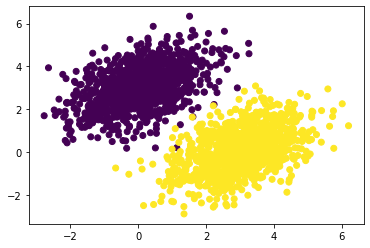

In [16]:
# Listing 3.16 Plotting the two point classes (see figure 3.6)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [17]:
# Listing 3.17 Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
# Listing 3.18 The forward pass function
def model(inputs):
  return tf.matmul(inputs, W) + b

In [19]:
# Listing 3.19 The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [20]:
# Listing 3.20 The training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [21]:
# Listing 3.21 The batch training loop
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.4214
Loss at step 1: 0.2353
Loss at step 2: 0.1216
Loss at step 3: 0.1006
Loss at step 4: 0.0928
Loss at step 5: 0.0871
Loss at step 6: 0.0821
Loss at step 7: 0.0776
Loss at step 8: 0.0735
Loss at step 9: 0.0696
Loss at step 10: 0.0662
Loss at step 11: 0.0630
Loss at step 12: 0.0600
Loss at step 13: 0.0573
Loss at step 14: 0.0548
Loss at step 15: 0.0526
Loss at step 16: 0.0505
Loss at step 17: 0.0486
Loss at step 18: 0.0468
Loss at step 19: 0.0452
Loss at step 20: 0.0438
Loss at step 21: 0.0424
Loss at step 22: 0.0412
Loss at step 23: 0.0401
Loss at step 24: 0.0390
Loss at step 25: 0.0381
Loss at step 26: 0.0372
Loss at step 27: 0.0364
Loss at step 28: 0.0356
Loss at step 29: 0.0350
Loss at step 30: 0.0343
Loss at step 31: 0.0338
Loss at step 32: 0.0333
Loss at step 33: 0.0328
Loss at step 34: 0.0323
Loss at step 35: 0.0319
Loss at step 36: 0.0316
Loss at step 37: 0.0312
Loss at step 38: 0.0309
Loss at step 39: 0.0306


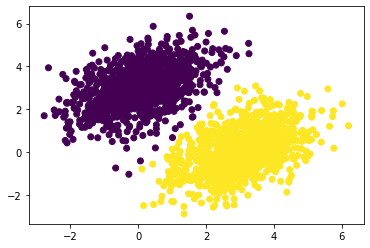

In [22]:
# model’s predictions on the training inputs
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

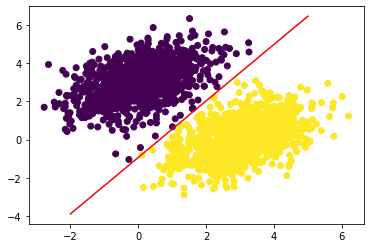

In [23]:
# visualized as a line
x = np.linspace(-2, 5, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 3.6 Anatomy of a neural network: Understanding core Keras API

- training a neural network revolves around the following objects:
  - Layers, which are combined into a network (or model)
  - The input data and corresponding targets
  - The loss function, which defines the feedback signal used for learning
  - The optimizer, which determines how learning proceeds

### 3.6.1 Layers: the building blocks of deep learning

- Layer
  - a data processing module that takes as input one or more tensors and that outputs one or more tensors
  - can be stateless or have a state
  - state
    - layer’s weights
    - one or several tensors learned with stochastic gradient descent
      - together contain the network’s knowledge
  - Types of layers
  - Vector data, rank-2 tensors
    - densely connected layers
  - Sequence data, rank-3 tensors
    - recurrent layers,
  - Image data, rank-4 tensors
    - 2D convolution layers

#### THE BASE LAYER CLASS IN KERAS

In [24]:
# Listing 3.22 A Dense layer implemented as a Layer subclass
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [25]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### AUTOMATIC SHAPE INFERENCE: BUILDING LAYERS ON THE FLY

In [26]:
# A dense layer with 32 output units
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [27]:
# Multiple layers
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [28]:
# we dont specify input shape if so we need to define for every layer as follows
'''
model = NaiveSequential([
  NaiveDense(input_size=784, output_size=32, activation="relu"),
  NaiveDense(input_size=32, output_size=64, activation="relu"),
  NaiveDense(input_size=64, output_size=32, activation="relu"),
  NaiveDense(input_size=32, output_size=10, activation="softmax")
])
'''

'\nmodel = NaiveSequential([\n  NaiveDense(input_size=784, output_size=32, activation="relu"),\n  NaiveDense(input_size=32, output_size=64, activation="relu"),\n  NaiveDense(input_size=64, output_size=32, activation="relu"),\n  NaiveDense(input_size=32, output_size=10, activation="softmax")\n])\n'

In [29]:
#  __call__() method of the base layer
'''
def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)
'''

'\ndef __call__(self, inputs):\n  if not self.built:\n    self.build(inputs.shape)\n    self.built = True\n  return self.call(inputs)\n'

In [30]:
# not defining input shape models become
'''
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])
'''

'\nmodel = keras.Sequential([\n    SimpleDense(32, activation="relu"),\n    SimpleDense(64, activation="relu"),\n    SimpleDense(32, activation="relu"),\n    SimpleDense(10, activation="softmax")\n])\n'

### 3.6.2 From layers to models

- A deep learning model is a graph of layers
- network topologies
  - Two-branch networks
  - Multihead networks
  - Residual connections
- The topology of a model defines a hypothesis space


### 3.6.3 The “compile” step: Configuring the learning process

- Loss function (objective function)
  - The quantity that will be minimized during training. It represents a measure of success for the task at hand.
- Optimizer
  - Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).
- Metrics
  - The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.
-  compile() and fit() methods to start training your model
- The compile() method configures the training process It takes the arguments optimizer , loss , and metrics

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["accuracy"])

In [32]:
# Compilation
'''
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
  optimizer="rmsprop",
  loss="mean_squared_error",
  metrics=["accuracy"])
'''
# or
'''
model.compile(
  optimizer=keras.optimizers.RMSprop(),
  loss=keras.losses.MeanSquaredError(),
  metrics=[keras.metrics.BinaryAccuracy()])
'''
# Or
'''
model.compile(
  optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
  loss=my_custom_loss,
  metrics=[my_custom_metric_1, my_custom_metric_2])
'''

'\nmodel.compile(\n  optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),\n  loss=my_custom_loss,\n  metrics=[my_custom_metric_1, my_custom_metric_2])\n'

- Optimizers
  - SGD
  - RMSprop
  - Adam
  - Adagrad
- Losses
  - CategoricalCrossentropy
  - SparseCategoricalCrossentropy
  - BinaryCrossentropy
  - MeanSquaredError
  - KLDivergence
  - CosineSimilarity
- Metrics
  - CategoricalAccuracy
  - SparseCategoricalAccuracy
  - BinaryAccuracy
  - AUC
  - Precision
  - Recall

### 3.6.4 Picking a loss function

- binary crossentropy
  - a two-class classification problem
- categorical crossentropy 
  - many-class classification problem

### 3.6.5 Understanding the fit() method

- implements the training loop itself
  - The data (inputs and targets) to train on. It will typically be passed either in the form of NumPy arrays or a TensorFlow Dataset object.
  - The number of epochs to train for: how many times the training loop should iterate over the data passed.
  - The batch size to use within each epoch of mini-batch gradient descent

In [33]:
# Listing 3.23 Calling fit() with NumPy data
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 5.5561 - accuracy: 0.4495
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 5.2476 - accuracy: 0.4460
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 4.9904 - accuracy: 0.4410
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 4.7527 - accuracy: 0.4350
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 4.5244 - accuracy: 0.4285


In [34]:
history.history

{'accuracy': [0.4494999945163727,
  0.44600000977516174,
  0.4410000145435333,
  0.4350000023841858,
  0.4284999966621399],
 'loss': [5.556097507476807,
  5.247644901275635,
  4.990372180938721,
  4.752741813659668,
  4.524419784545898]}

### 3.6.6 Monitoring loss and metrics on validation data

- Goal of machine learning is to obtain 
  - models that perform well on the training data
  - models that perform well in general
  - models that perform well on data points that the model has never encountered before.

In [35]:
# Listing 3.24 Using the validation_data argument
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1817 - binary_accuracy: 0.9579 - val_loss: 0.0305 - val_binary_accuracy: 0.9950
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0735 - binary_accuracy: 0.9593 - val_loss: 0.1536 - val_binary_accuracy: 0.9467
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0667 - binary_accuracy: 0.9650 - val_loss: 0.1131 - val_binary_accuracy: 0.9533
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0780 - binary_accuracy: 0.9586 - val_loss: 0.0306 - val_binary_accuracy: 0.9967
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0736 - binary_accuracy: 0.9529 - val_loss: 0.0469 - val_binary_accuracy: 1.0000


In [36]:
# compute the validation loss and metrics
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 2ms/step - loss: 0.0469 - binary_accuracy: 1.0000


### 3.6.7 Inference: Using a model after training

In [37]:
predictions = model.predict(val_inputs)
print(predictions[:10])

[[0.22638872]
 [0.05863735]
 [0.8692137 ]
 [0.12290782]
 [1.0055432 ]
 [0.66214746]
 [0.17730835]
 [0.11579832]
 [0.7149893 ]
 [0.7100884 ]]


In [38]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.22638872]
 [0.05863735]
 [0.8692137 ]
 [0.12290782]
 [1.0055432 ]
 [0.66214746]
 [0.17730835]
 [0.11579832]
 [0.7149893 ]
 [0.7100884 ]]


## Summary

- TensorFlow is an industry-strength numerical computing framework that can run on CPU, GPU, or TPU. It can automatically compute the gradient of any differentiable expression, it can be distributed to many devices, and it can export programs to various external runtimes—even JavaScript.
- Keras is the standard API for doing deep learning with TensorFlow.
- Key TensorFlow objects include tensors, variables, tensor operations, and the gradient tape.
- The central class of Keras is the Layer . A layer encapsulates some weights and some computation. Layers are assembled into models.
- Before you start training a model, you need to pick an optimizer, a loss, and some metrics, which you specify via the model.compile() method.
- To train a model, you can use the fit() method, which runs mini-batch gradient descent for you. You can also use it to monitor your loss and metrics on validation data, a set of inputs that the model doesn’t see during training.
- Once your model is trained, you use the model.predict() method to generate predictions on new inputs.

### END